## Table of contents

- [Introduction](##Introduction)
- [Data preparation](##Data-prepration-and-exploration)
- [Suicide rate destribution by age groups](##Suicide-rate-destribution-by-age-groups)
- [Russian case](##Russian-case)
- [Suicide and economic factors](##Suicide-and-economic-factors)
- [Results](##Results)


## Introduction

**Definition.** In this work suicide is accepted in classic Durkheim's definition: "...all cases of death resulting directly or indirectly from a positive or negative act of the victim himself, which he knows will produce this result." The key factor is intention to commit suicide but as it will be discussed later it is not always possible to establish whether the death was voluntary. 


**Why is it important to study suicides?** Besides moral costs and being marker of social decease, a high rate of suicide has it's economic costs. It usually includes direct medical costs and indirect future earnings. However, estimates of these costs differ: 
1. \$260 691 per person who committed suicide (Stoudemire, Frank, Hedemark, Kamlet, & Blazer, 1986)
2. \$33 000 per person who attempted suicide (Palmer, 1995)
3. \$141 923 per person who's death cause was self-inflicted injury (Donald Shepard, 2015). 97\% of costs are indirect (lost of productivity). 
4. \$27.43 millions per person died from self-inflicted injury. (Ian R.H. Rockett, Bina Ali, Eric D. Caine, Donald S. Shepard, 2023). Authors estimated quality of life losses which gave the predominant sum. 
5. Bijou Yang and David (2007) Lester argue that previous scholars did not take into account potential savings from non-treatment depression cases and savings from pensions and nursing. If we do, we will get \$5.07 billion net savings from suicides. 
\*All of scholars above are related to the United States statistic. Estimates have not been corrected to inflation and approximately represent costs by a year of publishing the paper.

**Statistical issues.** Official national statistics of suicide rates underestimate suicides due to a lack of possibilities to determine whether the death was intentional or not (I.R.H. Rockett, N.D. Kapusta , J.H. Coben JH, 2014; P.N. Cooper, C.M. Milroy, 1995). Futhermore, one of the most reliable source of world mortality World Health Organisation (WHO) has no statistics exactly about suicides but only about 'self-inflicted injures' which will be used in this analysis.   

Emile Durkheim - a classic of sociology - had studied suicides in his book of the same name published in 1897. He analyzed specific statistics and suggested 3 main types of suicides: egoistic, altruistic and anomic one. WHO's data can be used to verify the last type by analysing particular countries which will be done in this analysis on the Russian case example.   

**The goal** of the analysis is to explore fundamental suicide statistics and valuate Durkheim's explanations of suicides. 

## Data prepration and exploration

On this stage the data is being uploaded from  [WHO mortality database](https://platform.who.int/mortality/themes/theme-details/topics/indicator-groups/indicator-group-details/MDB/self-inflicted-injuries), extra columns with duplicated information (for instance, Age group code and Age group contain the same info for out analysis), Nan values will be deleted. For visualisation proposes age groups with zero death rate also will be deleted. 

Main target values for this analysis are death rate per 100 000 population and percentage of suicides out of total deaths. The data is provided since 1950.

Each age group is recorded with square brackets like "[10-15]". Therefore, the function remove_brackets will be defined below.

Due to the specific of the data, variance coefficient for death rate is 56% > 33% (and 140% through all data set). That's why further below median method is used for all groupings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pygal_maps_world.maps import World, COUNTRIES


df = pd.read_csv('who_database.csv', sep = ';')

In [2]:
df = df[['Region Name','Country Name', 'Country Code', 'Year','Sex','Age Group','Percentage of cause-specific deaths out of total deaths', 'Death rate per 100 000 population']]
df.head()

,Region Name,Country Name,Country Code,Year,Sex,Age Group,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,Europe,Albania,ALB,1987,All,[Unknown],NaN,NaN
1,Europe,Albania,ALB,1987,All,[85+],0.044924,10.000000
2,Europe,Albania,ALB,1987,All,[80-84],0.000000,0.000000
3,Europe,Albania,ALB,1987,All,[75-79],0.047281,3.246753
4,Europe,Albania,ALB,1987,All,[70-74],0.000000,0.000000


In [3]:
for i in enumerate(['[0]','[1-4]','[5-9]','[Unknown]']):
    df = df.drop(df[df['Age Group'] == i[1]].index)
df.dropna(inplace = True)
df = df.rename(columns = {'Death rate per 100 000 population' : 'Death rate', 'Percentage of cause-specific deaths out of total deaths': 'Percentage'})

In [4]:
df.describe()

,Year,Percentage,Death rate
count,233810.000000,233810.000000,233810.000000
mean,1992.808793,4.141732,15.071197
std,18.171901,6.669967,20.992008
min,1950.000000,0.000000,0.000000
25%,1979.000000,0.204918,2.045832
50%,1996.000000,1.265823,8.547009
75%,2008.000000,5.128205,19.718214
max,2021.000000,100.000000,1000.000000


In [5]:
var_coef_total = df.describe()['Death rate']['std'] / df.describe()['Death rate']['mean']
var_coef = df.loc[(df['Age Group'] == '[All]') & (df['Sex'] == 'All')].describe()['Death rate']['std'] / df.describe()['Death rate']['mean']
print(f'Total variation coefficient is {var_coef_total}')
print(f'Variation coefficient is {var_coef}')

Total variation coefficient is 1.392856048130563
Variation coefficient is 0.5562222828989279


In [6]:
def remove_brackets(df: pd.Series):
    values = df.unique()
    new_values = [i[1:-1] for i in values]
    replace_values = dict(zip(values, new_values))
    df = df.replace(replace_values)
    return df

df['Age Group'] = remove_brackets(df['Age Group'])


## Suicide, age and gender

Let's group the data set by sex and age and see what people is most of all in risk group. The most frequently suicide affects people over age 80. In spite of buzz about teen's high suicide rates, they commit suicide less than any other people do. Distribution by sex reveals that women's suicide is spread in the middle-age (45-70) while death rate of men increases over the years. 

Dynamic of suicide rates by sex *presents similar tendency for both genders*: decreasing suicide rates. Also, the figure 3 confirms the data on the fig. 2 - *men more frequently commit suicide* (there is no year since 1950 which in women suicide rate is more that men's one). 

It's interesting to measure variation between men and women death rate each year to give numeric estimation of how two time series replicate each other. Another words, the goal is to measure whether two curves act the same over time. The variation coefficient of distance between two curves can be used for our purpose. It is not applicable for measurement opposite tendencies or assumption that one curve can change more than the other one (for instance, $x^2$ and $e^x$) but our goal is free from these biases. So, variation coefficient is 0.14 (14\%) - therefore, *there are no statistically significant differences between dynamic patterns of men and women suicides*. 

While distinctions of suicide rates are obvious, the reason of it is unclear. It's essential to keep in mind the process of gathering the data. P.N. Cooper and C.M. Milroy (1995) noted that women's suicide can be under-reported because of difference in methods of committing it: "*Over 50 per cent of females chose poisoning with solid or liquid compared to less than one third of males. This method of suicide had the second lowest rate of suicide verdicts at 40 per cent of cases.*" Using the self-injury statistics smooths out these distortions but does not remove them.



In [7]:
df_age_groups = df.groupby(['Sex','Age Group'], as_index = False).agg({'Death rate':'median'})

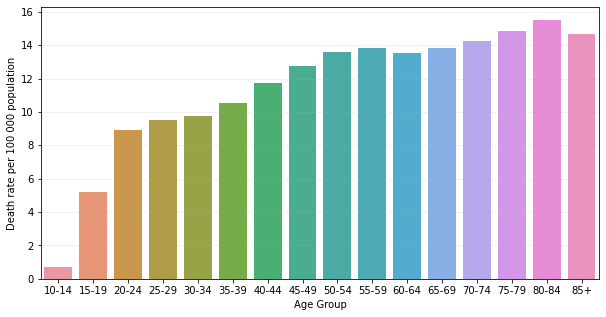

In [8]:
plt.figure(figsize = (10,5))
sns.barplot(
    data = df_age_groups.loc[(df_age_groups['Sex'] == 'All') & (df_age_groups['Age Group'] != 'All')], 
    x = 'Age Group', y = 'Death rate')

plt.ylabel('Death rate per 100 000 population')
plt.grid(alpha = 0.2, axis = 'y')
plt.savefig('Figure 1. Mean world suicide death rate disctribution by age groups since 1950.png')
plt.show()

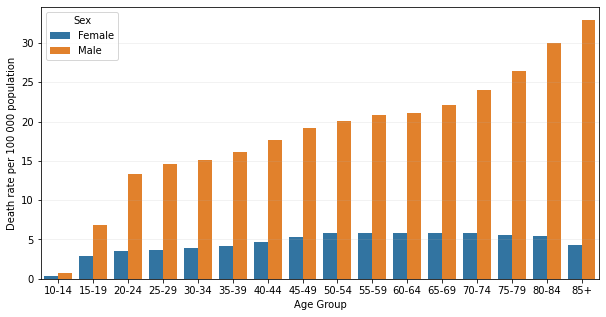

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(
    data = df_age_groups.loc[(df_age_groups['Sex'] != 'All') & (df_age_groups['Age Group'] != 'All')], 
    x = 'Age Group', y = 'Death rate', hue = 'Sex')

plt.ylabel('Death rate per 100 000 population')
plt.grid(alpha = 0.2, axis = 'y')
plt.savefig('Figure 2. Mean world suicide death rate disctribution by sex and age groups since 1950.png')
plt.show()

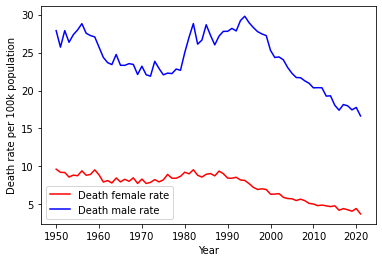

In [10]:
df_sex = df.groupby(['Year','Sex'],as_index = False) \
    .agg({'Death rate': 'mean', 'Percentage':'mean'})

df_sex_female = df_sex.loc[df_sex['Sex'] == 'Female']
df_sex_male = df_sex.loc[df_sex['Sex'] == 'Male']

plt.figure(figsize = (6,4))
plt.plot('Year', 'Death rate', label = 'Death female rate', color = 'red', data= df_sex_female,)
plt.plot(df_sex_male['Year'], df_sex_male['Death rate'], label = 'Death male rate', color = 'blue' )

plt.legend()
plt.ylabel('Death rate per 100k population')
plt.xlabel('Year')
plt.savefig('Figure 3. Suicide death rate per 100k population by sex.png')
plt.show()


In [11]:
difference = np.array(df_sex_male['Death rate']) - np.array(df_sex_female['Death rate'])

difference.std() / difference.mean()

0.1396300801270288

## Russian case 

Looking at the first figure which presents suicide rate dynamic one can see a significant increase both suicide rate and percentage of suicide in all deaths in 1990s. It can be explained with:

- **a high number of crimes** at that period 
- **economic crisis and poverty**
- **anomie state** (in terms of Durheim's definition). (Durkheim, E. Suicide: A Study of Sociology. 1897). Durkheim's explanation was a crisis of values when demand of people from different stratum are not limited by social norms of consumption. 

However, the figure 5 with the same indicators but for the whole world shows similar dynamic in the period. Hardly criminogenic situation was the main factor all over the world and economic poverty can't be extended to all countries. Anomie state also do not explain rising suicide rates over the world because it is deeply connected with culture which is not the same for all societies. That's why *either Durkheim's definition of anomie state should be enhanced or anomie state is not enough for rising suicide rates*.   

In [12]:
df_russia = df \
    .loc[(df['Country Name'] == 'Russian Federation') & (df['Sex'] == 'All') & (df['Age Group'] == 'All')][['Year', 'Death rate','Percentage']] \
    .groupby('Year',as_index = False) \
    .agg({'Death rate':'median', 'Percentage':'median'})

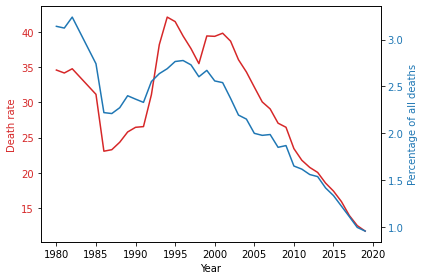

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Death rate', color=color)
ax1.plot(df_russia['Year'], df_russia['Death rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Percentage of all deaths', color=color)  
ax2.plot(df_russia['Year'], df_russia['Percentage'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig('Figure 4. Suicide rate dynamically in Russia since 1980 to 2020.png')
plt.show() 

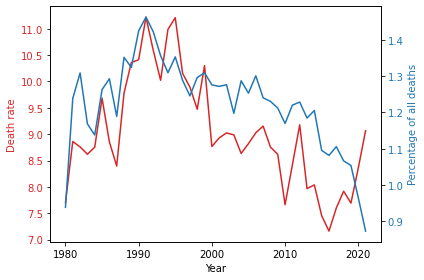

In [14]:
df_world = df \
    .loc[(df['Sex'] == 'All') & (df['Age Group'] == 'All') & (df['Year'] >= 1980)][['Year', 'Death rate','Percentage']] \
    .groupby('Year',as_index = False) \
    .agg({'Death rate':'median', 'Percentage':'median'})

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Death rate', color=color)
ax1.plot(df_world['Year'], df_world['Death rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Percentage of all deaths', color=color)  
ax2.plot(df_world['Year'], df_world['Percentage'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.savefig('Figure 5. Mean suicide rate across the world since 1980 to 2020.png')
plt.show()

## Suicide and economic factors

The significant part of literature is dedicated to establish association between suicide and poverty (J. Bantjes, V. Iemm, 2016). Emile Durkeim (1897) argued that low-income is protective factor from suicide mainly because of 2 reasons: affluence can lead to anomie or egoistic suicide, poor communities are more united, so the feeling of social integration prevent from intentional self-inflicted deaths. Fabio Ferretti and Anna Coluccia (2009) gave a supporting statistics for the first Durkeim's explanation using discriminant analysis - European countries with low healthcare expenditure, education level and high annual GDP growth have high suicide rates while states with less thriving economies have also less suicides.  Nevertheless, analysis in this study considered unemployment rate is non significant but Anja Baumbach, Gabriel Gulis (2014) came to opposite conclusion studying the same countries: "*...when social spending is low in a country, unemployment rate has a stronger effect on suicide mortality*". Another study (S. Burrows, N. Auger, M. Roy, C. Alix, 2010) revealed a correlation between suicides and inequality which can be an explanation for the results of Fabio Ferretti and Anna Coluccia (2009). Case-study in Portugal (Paula Santana, Cláudia Costa, Graça Cardoso, Adriana Loureiro, João Ferrão, 2015) also committed an association between material deprivation, economic crisis and suicides. 

Thus, GDP growth can influence on suicide through:
- healthcare and social insurance expenditure 
- economic inequality
- unemployment

But can GDP be directly related to suicides? *The purpose of this part is to visualize some statistics, explore correlation between annual GDP growth and suicides and make a linear regression to demonstrate the possibilities of it's interpretations*. The same results can be established by pairwise comparison of categorical data.

Firstly, let's match classification of the country by World Bank (high, upper middle, lower middle and low income) for 2021 and death rate dynamic. It is not quite correct to use classification just for one year and extrapolate it to all times but assume that relative position of countries have not changed much. Fig. 6 presents that lower middle countries suicide mortality have been between high and upper middle most of time expect the period 1975 - 1986. High income countries usually have also the highest suicide rates. One can already spot non-linear dependence from economic factors and this hypothesis will be confirmed later. 

Fig. 7 is an interactive map which on suicide rate by countries were displayed. Despite a lack of statistics for African countries, examples for both positive and negative relation between income and suicides can be found.   

Finally, we will get a quantitative estimate of the association. World Bank's data set with annual GDP growth by years and countries was merges to the original data set to explore a correlation. Annual growth is considered to represent changes in financial position of residents which are more essential than just a static position. Fig. 8 display a distribution of investigated variables - another proof that there is no linear association between them, hence regression analysis can be used. Correlation coefficient gives numeric evidence for this claim, it is 0.0032 and 0.0010 for all data set and data set without outliers respectively - *there is no significant association between GDP growth and suicide mortality*.

At last, let's discuss making linear regression where variables are original data set's columns: age group, sex and region. Each value of age group was converted to the middle of a particular interval and scaled. Since sex and region are categorical variables, they have been coded with one-hot encoding in order to get relevant results. It's  important to note that all weights of categorical variables only can be compared with each other. Both linear models with and without regularization were tested. Even Lasso model gives edge solutions and make some of weights equal to zero. Median absolute error is used as a metric since data set contains outliers. Lasso model performs better within statistical margin of error, therefore regression without regularization will be used for analysis.

Sorting weights of trained model one can see results that have been obtained later - men commit suicide more frequently than women. Also, regions with the highest suicide rates are Europe and Oceania, America and Asia are with the lowest ones. *This is indicative because one of the richest region (Europe) is close to poor rural region of Oceania - another proof of absence of correlation*. 


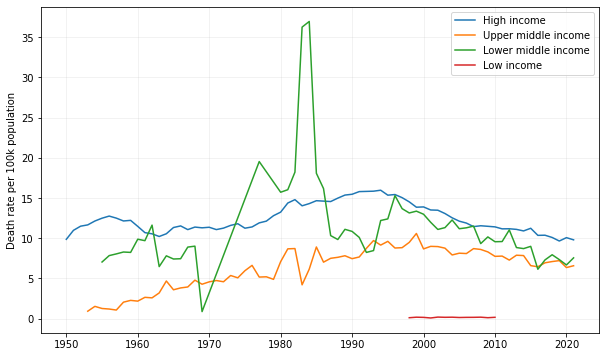

In [15]:
df_classification = pd.read_excel('classification_worldbank.xlsx')
df_classification = df_classification[['Economy', 'Income group']].dropna() \
                    .rename({'Economy':'Country Name', 'Income group': 'Income'},axis = 1)

df_classification = pd.merge(df\
                    .loc[(df['Sex'] == 'All') & (df['Age Group'] == 'All')][['Country Name', 'Year','Death rate']], df_classification, how = 'inner', on = 'Country Name')
df_classification = df_classification.groupby(['Income', 'Year'], as_index = False)\
                    .agg({'Death rate' :'mean'})
df_classification.dropna(inplace = True)

df_classification['Income'].unique()

plt.figure(figsize = (10,6))
for i, income_group in enumerate(['High income', 'Upper middle income', 'Lower middle income', 'Low income']):
    df_group = df_classification.loc[df_classification['Income'] == income_group]
    plt.plot(df_group['Year'], df_group['Death rate'], label = income_group)

plt.legend()
plt.ylabel('Death rate per 100k population')
plt.grid(alpha = 0.2)
plt.savefig('Figure 6. Dynamic of death rate by income groups.png')
plt.show()

In [16]:
worldmap = World()
worldmap.title = 'World map suicide rate distribution'
country_code = COUNTRIES

df_map = df.loc[(df['Sex'] == 'All') & (df['Age Group'] == 'All')][['Country Name', 'Death rate']]
df_map = df_map.groupby('Country Name', as_index = False).agg({'Death rate':'mean'})
df_map['Country Name'][[111, 112, 115,46]] = ['United Kingdom', 'United States', 'Venezuela', 'Iran']


countries_dict = {}
for key, value in country_code.items():

    death_rate = df_map.loc[df_map['Country Name'] == value]['Death rate'].values
    if len(death_rate) != 0:
        countries_dict[key] = death_rate
worldmap.add('Suicide rate', countries_dict)
worldmap.render_to_file('Figure 7. World_map.svg')

C:\Users\Никита\AppData\Local\Temp\ipykernel_4440\2470782496.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map['Country Name'][[111, 112, 115,46]] = ['United Kingdom', 'United States', 'Venezuela', 'Iran']


In [17]:
years = list(map(str, range(1961,2014)))
df_gdp = pd.read_csv('annual_gdp_growth_worldbank.csv', sep = ';')[['Country Code', *years]]

df_gdp.dropna(axis = 0, thresh = 21, inplace = True)
df_gdp[years] = df_gdp[years].apply(lambda x: x.fillna(x.mean()), axis = 1)

df_gdp.set_index(df_gdp['Country Code'], inplace = True)
df_gdp.drop('Country Code', inplace = True, axis = 1)
df_gdp = pd.DataFrame(df_gdp.stack())
df_gdp.rename(columns = {0:'GDP'}, inplace = True)
df_gdp.index.names = 'Country Code', 'Year'

df_corr = df[['Country Code', 'Year', 'Death rate']]
df_corr['Year'] = df_corr['Year'].astype(str)
df_corr.set_index(['Country Code', 'Year'], inplace = True)
df_corr = pd.merge(df_corr, df_gdp, how='inner', left_index=True, right_index=True)

C:\Users\Никита\AppData\Local\Temp\ipykernel_4440\3847916312.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Year'] = df_corr['Year'].astype(str)


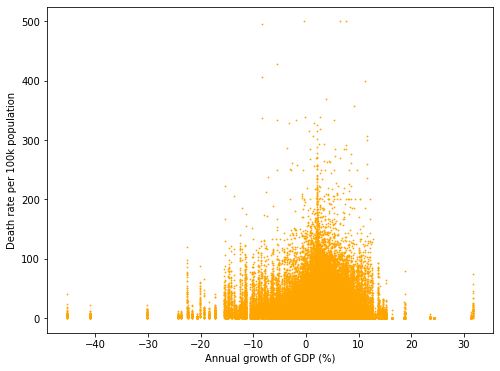

In [26]:
plt.figure(figsize = (8,6))

plt.scatter(df_corr['GDP'] , df_corr['Death rate'], s= 0.6, c = 'orange')

plt.xlabel('Annual growth of GDP (%)')
plt.ylabel('Death rate per 100k population')

plt.savefig('Fig 8.Dependence of suicide rates and annual growth.png')
plt.show()

In [19]:
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df_corr['GDP'], df_corr['Death rate'])
print(corr_coef, p_value)

0.003193914203155618 0.19561715817212721


In [20]:
df_corr_subset = df_corr.loc[(df_corr['Death rate'] < 300 ) & (abs(df_corr['GDP']) < 25)]
corr_coef, p_value = pearsonr(df_corr_subset['GDP'], df_corr_subset['Death rate'])
print(corr_coef, p_value)

0.0010506245346760534 0.670590554191358


In [21]:
cat_features = pd.get_dummies(df[['Sex', 'Region Name']].loc[(df['Age Group'] != 'All') & (df['Sex'] != 'All')])
num_features = df['Age Group'].loc[(df['Age Group'] != 'All') & (df['Sex'] != 'All')]
target = df['Death rate'].loc[(df['Age Group'] != 'All') & (df['Sex'] != 'All')]

inital_values = num_features.unique()
new_values = list(range(12,88,2))
num_features.replace(dict(zip(inital_values, new_values)), inplace = True)

features = pd.merge(cat_features, num_features, left_index = True, right_index = True, how = 'inner')
features

,Sex_Female,Sex_Male,Region Name_Africa,Region Name_Asia,Region Name_Central and South America,Region Name_Europe,Region Name_North America and the Caribbean,Region Name_Oceania,Age Group
25,0,1,0,0,0,1,0,0,12
26,0,1,0,0,0,1,0,0,14
27,0,1,0,0,0,1,0,0,16
28,0,1,0,0,0,1,0,0,18
30,0,1,0,0,0,1,0,0,20
...,...,...,...,...,...,...,...,...,...
299412,1,0,1,0,0,0,0,0,34
299413,1,0,1,0,0,0,0,0,36
299414,1,0,1,0,0,0,0,0,38
299415,1,0,1,0,0,0,0,0,40


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import median_absolute_error

scaler = StandardScaler()
scaler.fit(features['Age Group'].values.reshape(-1, 1))
features['Age Group'] = scaler.transform(features['Age Group'].values.reshape(-1, 1))

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.5)
regression = linear_model.Lasso()
alpha_grid = {'alpha':np.linspace(0.1,11)}
grid_search = GridSearchCV(regression, alpha_grid, cv = 5)

grid_search.fit(x_train, y_train)
grid_search.best_params_['alpha']

0.1

In [23]:
regression_1 = linear_model.LinearRegression()
regression_1.fit(x_train, y_train)
predictions_1 = regression_1.predict(x_test)


regression_2 = linear_model.Lasso(alpha = 0.1)
regression_2.fit(x_train, y_train)
predictions_2 = regression_2.predict(x_test)

print(f'Среднее квадратичное отклонение стандартной линейной регрессии: {median_absolute_error(predictions_1, y_test)}')
print(f'Среднее квадратичное отклонение оптимизированной Lasso: {median_absolute_error(predictions_2, y_test)}')

Среднее квадратичное отклонение стандартной линейной регрессии: 8.6672827815625
Среднее квадратичное отклонение оптимизированной Lasso: 8.560141931465104


In [24]:
weights = dict(zip(x_train.columns, regression_1.coef_))
sorted_weights = dict(sorted(weights.items(),  key = lambda x: x[1]))
print(sorted_weights)

{'Sex_Female': -687480074483.9197, 'Sex_Male': -687480074466.6902, 'Region Name_Africa': -433173737654.25165, 'Region Name_North America and the Caribbean': -433173737651.1874, 'Region Name_Central and South America': -433173737651.1309, 'Region Name_Asia': -433173737647.0803, 'Region Name_Oceania': -433173737646.0444, 'Region Name_Europe': -433173737639.27264, 'Age Group': 6.665246486663818}


## Results

- The most frequent age for suicide is over 80 and 45-70 for women specifically. Suicide mortality of men is steadily increasing with age.
- Men commit suicide 197 % more often accordingly to the global data. A part of this effect can be explained by difference in methods of suicide men and women choose for themselves.
- Men and women suicide rate show the same tendency deviating within the margin of error.
- Despite Durkheim's hypothesis, anomie state in society is not enough to raise increase of suicides.
- There is no correlation between annual GDP growth and suicides. Even if economic welfare influence through healthcare system, inequality or unemployment, direct association is excluded.